LABORATORIO 1

In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
# Para realizar la lectura de los datos y analisis de los datos importamos la libreria "pandas", ya que tiene gran flexibilidad y capacidad en manipulación de datos y
# su integración con otras bibliotecas.
import pandas as pd
# LabelEncoder es una herramienta para normalizar etiquetas categóricas, es decir, convierte etiquetas de texto en números enteros.
from sklearn.preprocessing import LabelEncoder
# La clase datetime permite la manipulación de fechas y horas
from datetime import datetime

In [4]:
#Carga de dataset con "pandas"
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Datasets/bikes.csv')

In [5]:
# Imprime cada fila y cada columna del Dataset
print(data)

                            model_name  model_year       kms_driven  \
0        Bajaj Avenger Cruise 220 2017        2017         17000 Km   
1     Royal Enfield Classic 350cc 2016        2016         50000 Km   
2                  Hyosung GT250R 2012        2012         14795 Km   
3           Bajaj Dominar 400 ABS 2017        2017   Mileage 28 Kms   
4                Jawa Perak 330cc 2020        2020          2000 Km   
...                                ...         ...              ...   
7852         Yamaha YZF-R15 150cc 2011        2011          7000 Km   
7853         Bajaj Discover 100cc 2015        2015  Mileage 80 Kmpl   
7854           Bajaj Pulsar 180cc 2016        2016          6407 Km   
7855              Bajaj V15 150cc 2016        2016          7524 Km   
7856           Bajaj Pulsar 220cc 2016        2016         15000 Km   

            owner     location       mileage      power   price  
0     first owner    hyderabad  \n\n 35 kmpl     19 bhp   63500  
1     first own

In [6]:
# Proporciona un resumen conciso de la estructura y la información de los datos en el Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB


In [7]:
# Con la siguiente linea de codigo convertimos las variables categoricas (object) a variables numericas
columnas_categoricas = data.select_dtypes(include=['object']).columns
# Convertimos variables fechas, si es que las hubiera a variables numericas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [8]:
#Procesamiento de frases o palabras,
#este código ejecuta un bucle que itera sobre todas las columnas que se han identificado como variables categóricas en el DataFrame "data".
#Luego, para cada columna categórica, se aplica la codificación de etiquetas utilizando la clase LabelEncoder
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [9]:
#Fechas a numeros
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [10]:
#resultado
print(data)

      model_name  model_year  kms_driven  owner  location  mileage  power  \
0             31        2017         414      0       237       41    114   
1           1133        2016        1353      0       237       41    119   
2            923        2012         280      0       237       36    168   
3            145        2017        1772      0       427       31    179   
4            943        2020         558      0        61        0    176   
...          ...         ...         ...    ...       ...      ...    ...   
7852        1681        2011        1532      0         7       54     85   
7853          87        2015        1795      0       156      104    217   
7854         234        2016        1474      0        61       91     95   
7855         328        2016        1576      0        61       79     19   
7856         271        2016         290      0       129       45    133   

       price  
0      63500  
1     115000  
2     300000  
3     100000  


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   model_name  7857 non-null   int64
 1   model_year  7857 non-null   int64
 2   kms_driven  7857 non-null   int64
 3   owner       7857 non-null   int64
 4   location    7857 non-null   int64
 5   mileage     7857 non-null   int64
 6   power       7857 non-null   int64
 7   price       7857 non-null   int64
dtypes: int64(8)
memory usage: 491.2 KB


In [ ]:
#Con este codigo llenamos los datos faltantes en cada unja de las columnas del dataset
# columnas_especificas = ['Price', 'Display Size (inches)']
# media_columnas = data[columnas_especificas].mean()
# data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   model_name  7857 non-null   int64
 1   model_year  7857 non-null   int64
 2   kms_driven  7857 non-null   int64
 3   owner       7857 non-null   int64
 4   location    7857 non-null   int64
 5   mileage     7857 non-null   int64
 6   power       7857 non-null   int64
 7   price       7857 non-null   int64
dtypes: int64(8)
memory usage: 491.2 KB


In [13]:
# Lectura de Datos
X = data.iloc[:, :7]
y = data.iloc[:, 7]
m = y.size

In [14]:
print(X)
print('*'*25)
print(y)

      model_name  model_year  kms_driven  owner  location  mileage  power
0             31        2017         414      0       237       41    114
1           1133        2016        1353      0       237       41    119
2            923        2012         280      0       237       36    168
3            145        2017        1772      0       427       31    179
4            943        2020         558      0        61        0    176
...          ...         ...         ...    ...       ...      ...    ...
7852        1681        2011        1532      0         7       54     85
7853          87        2015        1795      0       156      104    217
7854         234        2016        1474      0        61       91     95
7855         328        2016        1576      0        61       79     19
7856         271        2016         290      0       129       45    133

[7857 rows x 7 columns]
*************************
0        63500
1       115000
2       300000
3       100000
4

In [15]:
# Definimos una función llamada featureNormalize que normaliza las características (variables) de una matriz X utilizando la normalización de características.
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [16]:
# Llamamos a la funcion featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

      model_name  model_year  kms_driven  owner  location  mileage  power
0             31        2017         414      0       237       41    114
1           1133        2016        1353      0       237       41    119
2            923        2012         280      0       237       36    168
3            145        2017        1772      0       427       31    179
4            943        2020         558      0        61        0    176
...          ...         ...         ...    ...       ...      ...    ...
7852        1681        2011        1532      0         7       54     85
7853          87        2015        1795      0       156      104    217
7854         234        2016        1474      0        61       91     95
7855         328        2016        1576      0        61       79     19
7856         271        2016         290      0       129       45    133

[7857 rows x 7 columns]
Media calculada: model_name     860.815706
model_year    2015.367698
kms_driven    1106

In [17]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [18]:
print(X)

[[ 1.         -1.60802672  0.40795438 ...  0.00951676 -0.37069464
  -0.17455079]
 [ 1.          0.52744196  0.15802864 ...  0.00951676 -0.37069464
  -0.09613498]
 [ 1.          0.12050146 -0.8416743  ...  0.00951676 -0.54337603
   0.67234002]
 ...
 [ 1.         -1.21465091  0.15802864 ... -1.23364243  1.35611919
  -0.47253089]
 [ 1.         -1.0324966   0.15802864 ... -1.23364243  0.94168387
  -1.6644513 ]
 [ 1.         -1.14295187  0.15802864 ... -0.75333092 -0.23254954
   0.12342931]]


In [19]:
# Funcion de costo, cuantifica cuán bien se ajusta nuestro modelo de regresión a los datos de entrenamiento
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [20]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [106073.58036541    281.22693822  19743.36544571  -3048.52765862
  -1605.40411572   2079.89388025 -48522.68113214  16828.10692537]
El valor predecido es (usando el descenso por el gradiente): 126561.6118


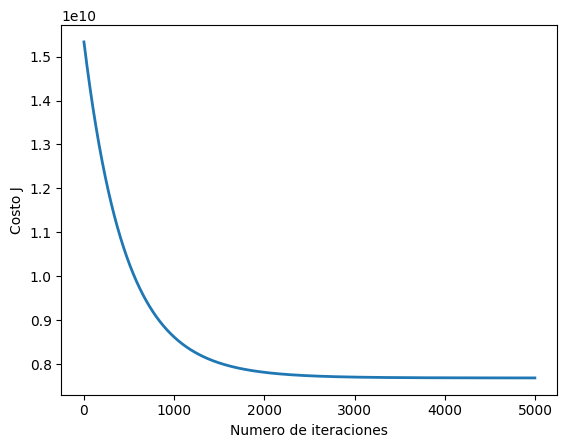

In [21]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(8)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un smart watch con distintas caracteristicas
X_array = [1, 33, 2016, 417, 0, 238, 42, 115]
X_array[1:8] = (X_array[1:8] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))

In [22]:
X_array = [1, 33, 2016, 417, 0, 238, 42, 115]
X_array[1:8] = (X_array[1:8] - mu) / sigma

In [23]:
X_array[1:8]

[-1.604151098476265,
 0.15802864322117988,
 -1.1598330717281864,
 -0.380597437772257,
 0.016580166637780006,
 -0.33615836780080677,
 -0.1588676291374521]

In [24]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [25]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio de una motocicleta usada en India

X_array = [1, 33, 2016, 417, 0, 238, 42, 115]
price = np.dot(X_array, theta)

print('Precio predecido para una motocicleta usada en India (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [106791.33689703   -146.88201625  19532.61115375  -2703.0931867
  -1684.70230893   1988.46319478 -49316.4306377   16596.02706103]
Precio predecido para una motocicleta usada en India (usando la ecuación de la normal): $38663006
